In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
df = pd.read_csv('./total_spkrinfo.list', delimiter=" ")

In [251]:
df.head()

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
0,Hin_0001,Female,Hindi,163.0,40.0,89.5,58.5,24.24,Rajasthan,Jaipur
1,Hin_0002,Female,Hindi,154.5,36.5,72,50.9,26.06,Madhya_Pradesh,Indore
2,Hin_0003,Male,Hindi,167.5,40.5,78,56.6,21.51,Haryana,Faridabad
3,Hin_0004,Male,Hindi,176.0,43.0,91.5,77.6,21.09,Chhattisgarh,Bilaspur
4,Hin_0005,Female,Hindi,153.0,40.5,96,80.2,27.39,Uttar_Pradesh,Kanpur_Nagar


In [252]:
weight, height = np.asarray(df['Weight']), np.asarray(df['Height'])

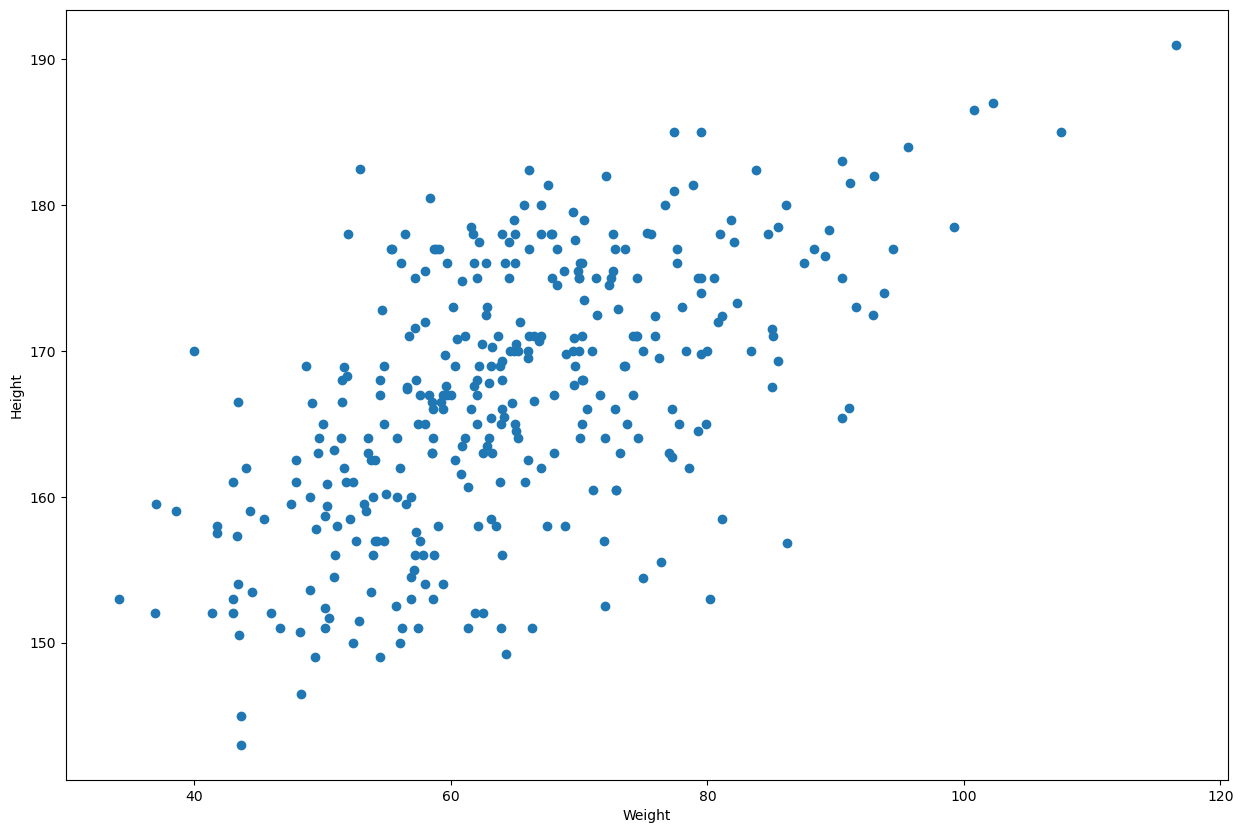

In [253]:
figure = plt.figure(figsize = (15, 10))
plt.scatter(weight, height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

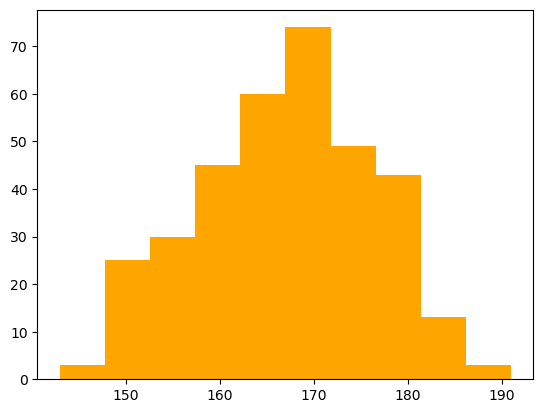

In [254]:
plt.figure()
plt.hist(df['Height'], color = 'orange')
plt.show()

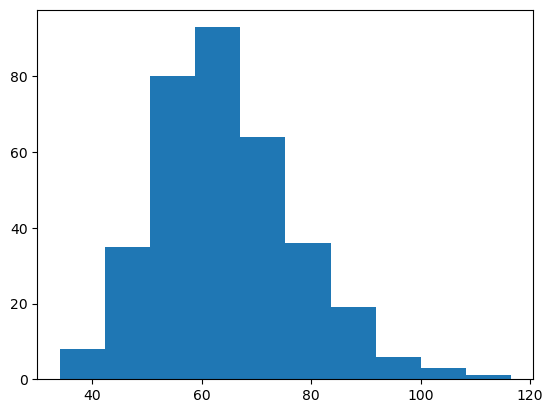

In [255]:
plt.figure()
plt.hist(df['Weight'])
plt.show()

In [256]:
df.describe()

,Height,Shoulder_size,Weight,Age
count,345.000000,345.000000,345.000000,345.000000
mean,166.945739,42.860870,64.684348,24.656174
std,9.093119,4.042133,12.992739,5.798831
min,143.000000,30.000000,34.100000,17.980000
25%,160.500000,40.000000,56.000000,20.350000
50%,167.000000,43.000000,63.500000,22.690000
75%,175.000000,46.000000,72.500000,26.810000
max,191.000000,55.000000,116.500000,47.530000


In [257]:
def plot_graphs(data, label):
    mu, std = data.mean(), data.std()
    x = np.linspace(start = data.min(), stop = data.max(), num = 5000)
    f = (1 / np.sqrt(2*np.pi * std**2)) * np.exp((-1/2)*((x-mu)/std)**2)
    
    print(f"Mean is: {mu} and standard deviation is: {std}")
    
    plt.hist(data, density = True)
    plt.plot(x, f)
    plt.xlabel(label)
    plt.show()

Mean is: 166.9457391304348 and standard deviation is: 9.093118954213136


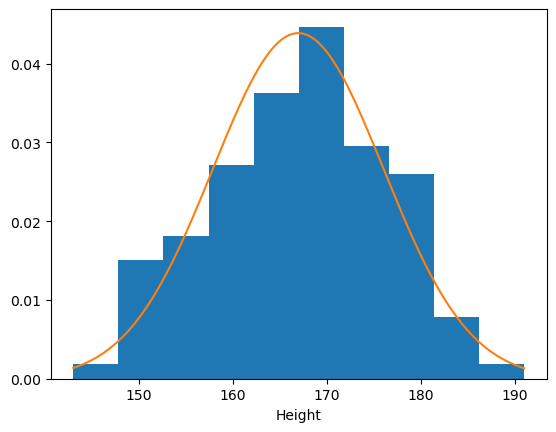

In [258]:
height = df['Height']
plot_graphs(height, 'Height')

Mean is: 64.68434782608695 and standard deviation is: 12.992738969331176


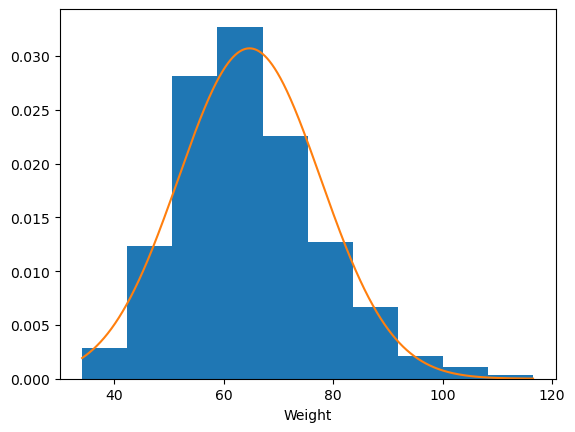

In [259]:
weight = df['Weight']
plot_graphs(weight, 'Weight')

In [260]:
x = df[['Weight', 'Height']]

In [261]:
mean = x.mean(axis=0)
mean

Weight     64.684348
Height    166.945739
dtype: float64

In [262]:
cov = x.cov()
cov

,Weight,Height
Weight,168.811266,69.463770
Height,69.463770,82.684812


In [263]:
print(x.shape)
print(mean.shape)
print(cov.shape)

(345, 2)
(2,)
(2, 2)


In [264]:
cov_inv = pd.DataFrame(np.linalg.inv(cov.values), cov.columns, cov.index)
cov_inv


,Weight,Height
Weight,0.009053,-0.007606
Height,-0.007606,0.018484


In [265]:
N = 500
X = np.linspace(30, 100, N)
Y = np.linspace(140, 190, N)
# XV, YV = np.meshgrid(X, Y)

In [266]:
f_xy = np.zeros(shape = (len(Y), len(X)))
for v, i in enumerate(Y):
    for u, j in enumerate(X):
        x = np.array([j, i])
        first = np.matmul(x - mean.values, cov_inv.values)
        f_xy[N - 1 - v, u] = (1 / (2 * np.pi * np.linalg.det(cov.values))) * np.exp(-0.5 * np.matmul(first, x - mean.values))
        

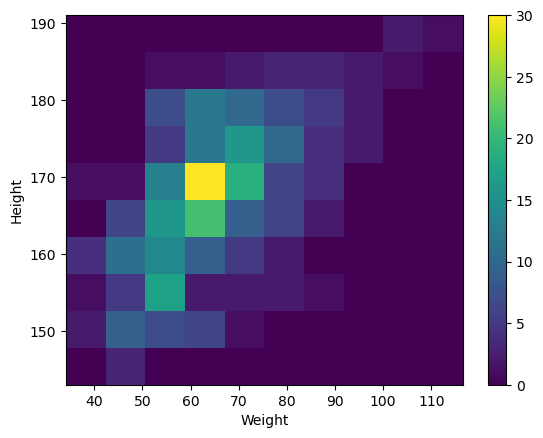

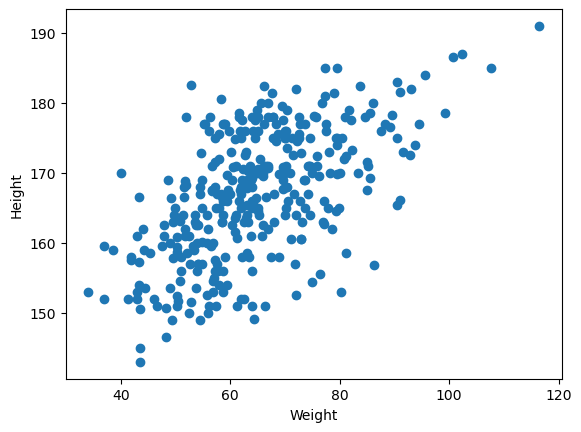

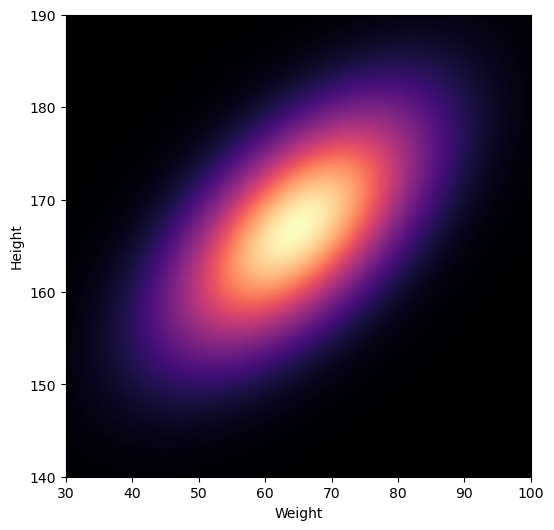

In [267]:
plt.hist2d(weight, height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.colorbar()
plt.show()

plt.scatter(weight, height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# plt.imshow(f_xy, cmap = 'magma')
# plt.xlabel('Weight')
# plt.ylabel('Height')
# plt.show()
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.imshow(f_xy, cmap='magma', interpolation='none', aspect = "auto", extent=[30,100,140,190])
# ax.set_aspect(1.5) # you may also use am.imshow(..., aspect="auto") to restore the aspect ratio
plt.show()

In [268]:
import scipy
F = np.random.multivariate_normal(mean, cov)
Z = F.pdf(pos)

ModuleNotFoundError: No module named 'scipy'

In [ ]:
Z.shape

(500, 500)

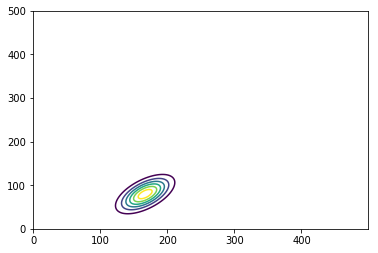

In [ ]:
plt.contour(Z)